In [1]:
# Import libraries
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Data Loading and Labelling

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the datasets
true_data = pd.read_csv('/content/drive/MyDrive/archive/True.csv')
fake_data = pd.read_csv('/content/drive/MyDrive/archive/Fake.csv')

In [4]:
# Add labels to distinguish real vs fake news
true_data['label'] = 'True'
fake_data['label'] = 'False'

In [5]:
# Combine the datasets
data = pd.concat([true_data, fake_data], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the data

data set label distribution:
 label
False    23481
True     21417
Name: count, dtype: int64


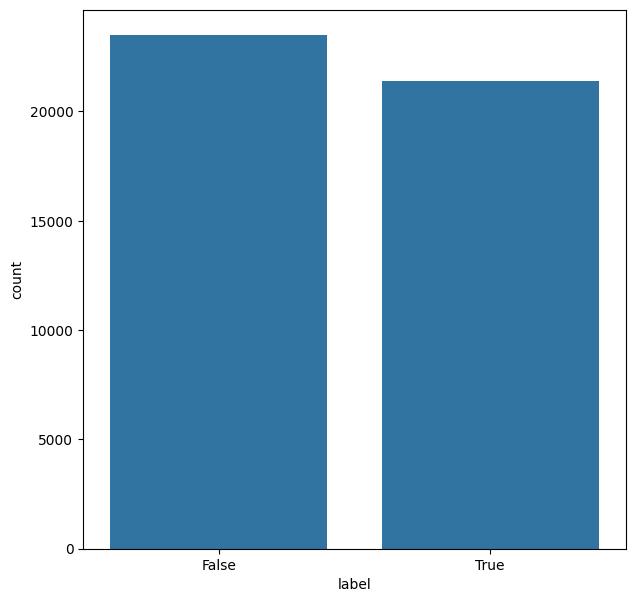

In [6]:
print('data set label distribution:\n',data['label'].value_counts())

plt.figure(figsize=(7,7))
sns.countplot(x = data['label'])
plt.show()

In [7]:
# Text and label columns
X = data['text']
y = data['label']

# Data Preprocessing

In [8]:
# Text Cleaning function
def clean_text(text):
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

In [9]:
# Apply cleaning to the text column
data['text'] = data['text'].apply(clean_text)

# Data Visualisation

Text(0, 0.5, 'Count')

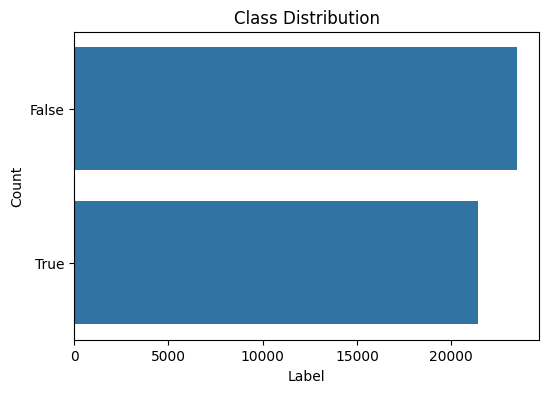

In [10]:
# Visualization: Class Distribution with Counts
plt.figure(figsize=(6, 4))
ax = sns.countplot(data['label'])
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

In [11]:
# Add count labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

In [12]:
# Function to get top N words or phrases
def get_top_n_words(corpus, n=5):
    vec = CountVectorizer(stop_words='english', ngram_range=(1, 1), max_features=1000)  # Adjust ngram_range for phrases
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    word_counts = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_counts = sorted(word_counts, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(word_counts[:n], columns=['Word/Phrase', 'Frequency'])

In [13]:
# Get top words for True news
true_words = get_top_n_words(data[data['label'] == 'True']['text'])
print("Top words for True news:")
print(true_words)

Top words for True news:
  Word/Phrase  Frequency
0        said      99039
1       trump      42599
2     reuters      28404
3   president      25548
4       state      18747


In [14]:
# Get top words for False news
false_words = get_top_n_words(data[data['label'] == 'False']['text'])
print("\nTop words for False news:")
print(false_words)


Top words for False news:
  Word/Phrase  Frequency
0       trump      73421
1        said      31008
2      people      25941
3   president      25495
4        just      20111


# Feature extraction using TF-IDF

In [15]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_vec = vectorizer.fit_transform(data['text'])

# Test-Train Split

In [16]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Model Training

In [17]:
# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

# Evaluating model with test set

In [18]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Model Evaluation

In [19]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.93      0.93      4669
        True       0.92      0.93      0.93      4311

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

